In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

### Data Cleaning

In [2]:
data = pd.read_excel('BD_IT.xlsx')

In [3]:
data.head()

,Job_Title,Job_Responsibility,Employment_Status,Experience,Gender,Age,Job_Location,Educational_Requirments,Additional_Requirments,Other_Benefits
0,PRODUCT,NaN,\nFull-time\n,2,\nMale\n,30.0,\n Sylhet,HSC,5,3
1,ENGINEERING,6.0,Full-time,1,Both,NaN,Dhaka,MSC,5,2
2,ENGINEERING,3.0,Full-time,2,Both,NaN,Dhaka,MSC,5,2
3,ENGINEERING,10.0,Full-time,3,Both,NaN,Dhaka,BSC,5,2
4,ENGINEERING,9.0,Full-time,8,Both,NaN,Dhaka,BSC,5,2


In [4]:
data = data.replace('\n','', regex=True)
data = data.replace('\r','', regex=True)

In [5]:
data['Job_Title'] = data['Job_Title'].str.strip()
data['Employment_Status'] = data['Employment_Status'].str.strip()
data['Gender'] = data['Gender'].str.strip()
data['Job_Location'] = data['Job_Location'].str.strip()
data['Educational_Requirments'] = data['Educational_Requirments'].str.strip()

In [6]:
data.isnull().values.sum()

244

In [7]:
data.isnull().sum()

Job_Title                    0
Job_Responsibility           1
Employment_Status            0
Experience                   0
Gender                       0
Age                        241
Job_Location                 2
Educational_Requirments      0
Additional_Requirments       0
Other_Benefits               0
dtype: int64

In [8]:
data['Age'].mean()

24.983333333333334

In [9]:
data['Job_Responsibility'].mean()

7.3880952380952385

In [10]:
data['Job_Location'].mode()

0    Dhaka
dtype: object

In [11]:
# Fill missing values with mean column values in the train set
data['Age'].fillna(int(data['Age'].mean()), inplace=True)
data['Job_Responsibility'].fillna(int(data['Job_Responsibility'].mean()), inplace=True)
data['Job_Location'].fillna('Dhaka', inplace=True)

In [12]:
data.isnull().sum()

Job_Title                  0
Job_Responsibility         0
Employment_Status          0
Experience                 0
Gender                     0
Age                        0
Job_Location               0
Educational_Requirments    0
Additional_Requirments     0
Other_Benefits             0
dtype: int64

In [13]:
data.keys()

Index(['Job_Title', 'Job_Responsibility', 'Employment_Status', 'Experience',
       'Gender', 'Age', 'Job_Location', 'Educational_Requirments',
       'Additional_Requirments', 'Other_Benefits'],
      dtype='object')

### Data pre-processing

In [14]:
data = pd.get_dummies(data, columns=['Job_Title'], prefix = ['Job_Title'])
data = pd.get_dummies(data, columns=['Employment_Status'], prefix = ['Employment_Status'])
data = pd.get_dummies(data, columns=['Gender'], prefix = ['Gender'])
data = pd.get_dummies(data, columns=['Job_Location'], prefix = ['Job_Location'])
data = pd.get_dummies(data, columns=['Educational_Requirments'], prefix = ['Educational_Requirments'])

In [15]:
data.keys()

Index(['Job_Responsibility', 'Experience', 'Age', 'Additional_Requirments',
       'Other_Benefits', 'Job_Title_ENGINEERING', 'Job_Title_LEADERSHIP',
       'Job_Title_PRODUCT', 'Job_Title_PROFESSIONAL',
       'Employment_Status_Contractual', 'Employment_Status_Full-time',
       'Employment_Status_Internship', 'Employment_Status_Part-time',
       'Gender_Both', 'Gender_Female', 'Gender_Male',
       'Job_Location_Chattogram', 'Job_Location_China',
       'Job_Location_Cox's Bazar', 'Job_Location_Cumilla',
       'Job_Location_Dhaka', 'Job_Location_Gaibandha', 'Job_Location_Gazipur',
       'Job_Location_Iraq', 'Job_Location_Japan', 'Job_Location_Jashore',
       'Job_Location_Khulna', 'Job_Location_Manikganj',
       'Job_Location_Mymensingh', 'Job_Location_Narayanganj',
       'Job_Location_Nilphamari', 'Job_Location_Rajshahi',
       'Job_Location_Sylhet', 'Educational_Requirments_BSC',
       'Educational_Requirments_DIPLOMA', 'Educational_Requirments_HSC',
       'Educational_Re

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 37 columns):
Job_Responsibility                 421 non-null float64
Experience                         421 non-null int64
Age                                421 non-null float64
Additional_Requirments             421 non-null int64
Other_Benefits                     421 non-null int64
Job_Title_ENGINEERING              421 non-null uint8
Job_Title_LEADERSHIP               421 non-null uint8
Job_Title_PRODUCT                  421 non-null uint8
Job_Title_PROFESSIONAL             421 non-null uint8
Employment_Status_Contractual      421 non-null uint8
Employment_Status_Full-time        421 non-null uint8
Employment_Status_Internship       421 non-null uint8
Employment_Status_Part-time        421 non-null uint8
Gender_Both                        421 non-null uint8
Gender_Female                      421 non-null uint8
Gender_Male                        421 non-null uint8
Job_Location_Chattogram    

In [18]:
data.describe()

,Job_Responsibility,Experience,Age,Additional_Requirments,Other_Benefits,Job_Title_ENGINEERING,Job_Title_LEADERSHIP,Job_Title_PRODUCT,Job_Title_PROFESSIONAL,Employment_Status_Contractual,...,Job_Location_Manikganj,Job_Location_Mymensingh,Job_Location_Narayanganj,Job_Location_Nilphamari,Job_Location_Rajshahi,Job_Location_Sylhet,Educational_Requirments_BSC,Educational_Requirments_DIPLOMA,Educational_Requirments_HSC,Educational_Requirments_MSC
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,...,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,7.387173,2.508314,24.420428,6.674584,3.019002,0.636580,0.206651,0.038005,0.118765,0.016627,...,0.002375,0.004751,0.004751,0.002375,0.004751,0.004751,0.743468,0.073634,0.011876,0.171021
std,3.897463,2.018498,2.537614,3.670480,1.638704,0.481557,0.405385,0.191435,0.323897,0.128022,...,0.048737,0.068842,0.068842,0.048737,0.068842,0.068842,0.437238,0.261485,0.108459,0.376976
min,1.000000,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,24.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,2.000000,24.000000,5.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,10.000000,3.000000,24.000000,9.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,17.000000,22.000000,40.000000,18.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# standardizing the data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data)

# statistics of scaled data
#pd.DataFrame(data_scaled).describe()

### k-means clustering

Text(0,0.5,'Inertia')

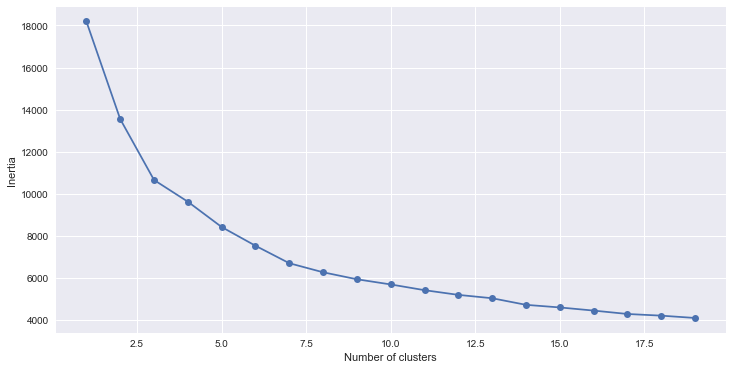

In [20]:
from sklearn.cluster import KMeans


# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [21]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 6, init='k-means++')
kmeans.fit(data)
pred = kmeans.predict(data)

In [22]:
df = pd.DataFrame(data)
df['cluster'] = pred
df['cluster'].value_counts()

3    125
1    125
0     86
2     56
4     26
5      3
Name: cluster, dtype: int64

### PCA as dimensionality reduction

In [23]:
from sklearn.decomposition import PCA

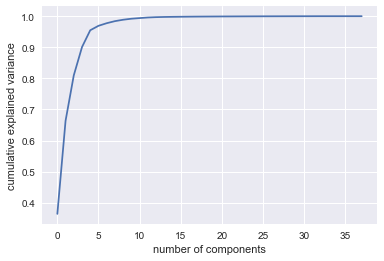

In [24]:
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [25]:
data.shape

(421, 38)

In [26]:
pca = PCA(2)  # project from 38 to 2 dimensions
projected = pca.fit_transform(data)
print(data.shape)
print(projected.shape)

(421, 38)
(421, 2)


C:\Users\Shazzad Hasan\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


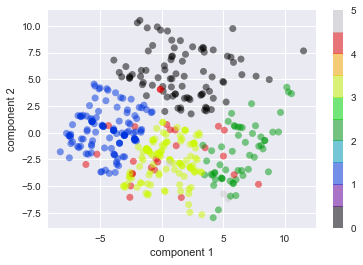

In [37]:
data['target'] = pred
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [27]:
df = pd.DataFrame(data = projected
             , columns = ['principal component 1', 'principal component 2'])

In [28]:
df.head()

,principal component 1,principal component 2
0,-0.459833,-2.467713
1,-2.229351,-0.567997
2,-4.794363,0.622678
3,1.485427,-2.896471
4,0.910613,-2.859391


In [29]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.3642291  0.29949333]
